# MNIST- handwritten digit recognition - Advanced Topics - Part 1
In this modeule, we will talk about how we can further improve performance using various techniques.

## Batch Normalization
Do you remember we normalized input images such that they have zero mean? The training converges faster when images are normalized (zero mean and unit variance) and decorrelated. However, the parameter update during the training changes distributions in each layer, which is called *internal covariant shift*. Ioffe and Szegedy suggested [batch normalization](https://arxiv.org/abs/1502.03167) to normalize and decorrelate inputs to the mid-layers to resolve this issue and make the netwrok training converges faster. 

In [6]:
# Implement Batch Normalization
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras import backend as K

K.set_image_dim_ordering( 'tf' )

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channel]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype( 'float32' )
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype( 'float32' )
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
def BN_model():
    # create model
    model = Sequential()
    model.add(Convolution2D(16, 3, 3, input_shape=(28, 28, 1), border_mode='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Convolution2D(16, 3, 3, border_mode='valid'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Convolution2D(32, 3, 3, border_mode='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Convolution2D(32, 3, 3, border_mode='valid'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(256))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(num_classes))
    model.add(BatchNormalization())
    model.add(Activation('softmax'))
    # Compile model
    model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
    return model
# build the model
model = BN_model()

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=20, batch_size=200,
verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
9s - loss: 0.7538 - acc: 0.8396 - val_loss: 2.8911 - val_acc: 0.1145
Epoch 2/20
8s - loss: 0.2869 - acc: 0.9607 - val_loss: 0.1399 - val_acc: 0.9859
Epoch 3/20
8s - loss: 0.1850 - acc: 0.9717 - val_loss: 0.0849 - val_acc: 0.9880
Epoch 4/20
8s - loss: 0.1328 - acc: 0.9777 - val_loss: 0.0587 - val_acc: 0.9906
Epoch 5/20
8s - loss: 0.1044 - acc: 0.9808 - val_loss: 0.0442 - val_acc: 0.9919
Epoch 6/20
8s - loss: 0.0881 - acc: 0.9826 - val_loss: 0.0405 - val_acc: 0.9911
Epoch 7/20
8s - loss: 0.0754 - acc: 0.9837 - val_loss: 0.0379 - val_acc: 0.9910
Epoch 8/20
8s - loss: 0.0686 - acc: 0.9844 - val_loss: 0.0330 - val_acc: 0.9921
Epoch 9/20
8s - loss: 0.0615 - acc: 0.9859 - val_loss: 0.0250 - val_acc: 0.9937
Epoch 10/20
8s - loss: 0.0559 - acc: 0.9866 - val_loss: 0.0234 - val_acc: 0.9940
Epoch 11/20
8s - loss: 0.0521 - acc: 0.9868 - val_loss: 0.0227 - val_acc: 0.9940
Epoch 12/20
8s - loss: 0.0501 - acc: 0.9872 - val_loss: 0.0227 - val

**Controversy**: Some people say they got better result by reversing the order of Activation and BatchNorm, but in this case, reversing order gave worse result. In principle, the BatchNorm layer should come before the Activation layer.

In [8]:
# Implement Batch Normalization - after the activation 

import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras import backend as K

K.set_image_dim_ordering( 'tf' )

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channel]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype( 'float32' )
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype( 'float32' )
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
def BNr_model():
    # create model
    model = Sequential()
    model.add(Convolution2D(16, 3, 3, input_shape=(28, 28, 1), border_mode='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Convolution2D(16, 3, 3, border_mode='valid'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Convolution2D(32, 3, 3, border_mode='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Convolution2D(32, 3, 3, border_mode='valid'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    model.add(BatchNormalization())
    # Compile model
    model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
    return model
# build the model
model = BNr_model()

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=20, batch_size=200,
verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
9s - loss: 8.0731 - acc: 0.2075 - val_loss: 10.1180 - val_acc: 0.1028
Epoch 2/20
8s - loss: 7.1452 - acc: 0.3332 - val_loss: 5.3596 - val_acc: 0.4771
Epoch 3/20
8s - loss: 6.6917 - acc: 0.4535 - val_loss: 5.1897 - val_acc: 0.6322
Epoch 4/20
7s - loss: 6.1551 - acc: 0.4118 - val_loss: 4.5167 - val_acc: 0.5369
Epoch 5/20
8s - loss: 5.4976 - acc: 0.5046 - val_loss: 3.3844 - val_acc: 0.6889
Epoch 6/20
7s - loss: 5.6653 - acc: 0.5611 - val_loss: 5.4644 - val_acc: 0.6904
Epoch 7/20
7s - loss: 5.7607 - acc: 0.5897 - val_loss: 5.8210 - val_acc: 0.6806
Epoch 8/20
8s - loss: 6.0808 - acc: 0.5940 - val_loss: 4.6271 - val_acc: 0.6558
Epoch 9/20
8s - loss: 7.3704 - acc: 0.5107 - val_loss: 6.8315 - val_acc: 0.5223
Epoch 10/20
8s - loss: 7.6610 - acc: 0.4419 - val_loss: 8.4770 - val_acc: 0.4536
Epoch 11/20
8s - loss: 7.5410 - acc: 0.3657 - val_loss: 6.6829 - val_acc: 0.3459
Epoch 12/20
8s - loss: 6.9014 - acc: 0.3016 - val_loss: 6.7791 - va

### Recording loss and metric
Below shows how to use Keras's callbacks for recording loss and metric. `keras.callbacks.History()` records events in to an object History(). Hading over the history object into `calback` option in `model.fit()` (or `model.compile()`) will return the output to `model.fit` as a dictionary. The dictionary has keys loss and metric for train and validation each. For our case here it would be: 'val_loss', 'val_acc', 'loss', 'acc'. A good use of such log is to monitor whether it's over fitting. When overfits, you will see the validation loss may go up at some point while train loss continues go down. Let's get rid of batch norm layers and run the model with higher running rate lr=0.01 and longer epoch (50) to see if it overfits (Answer: Yes it does, quite terribly).

In [4]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras.utils import np_utils
from keras import backend as K
from keras.callbacks import History
import time

K.set_image_dim_ordering( 'tf' )

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channel]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype( 'float32' )
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype( 'float32' )
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
def model_overfit():
    # create model
    model = Sequential()
    model.add(Convolution2D(16, 3, 3, input_shape=(28, 28, 1), border_mode='same'))
    #model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Convolution2D(16, 3, 3, border_mode='valid'))
    #model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #model.add(Dropout(0.2))
    model.add(Convolution2D(32, 3, 3, border_mode='same'))
    #model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Convolution2D(32, 3, 3, border_mode='valid'))
    #model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(256))
    #model.add(BatchNormalization())
    model.add(Activation('relu'))
    #model.add(Dropout(0.5))
    model.add(Dense(64))
    #model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(num_classes))
    #model.add(BatchNormalization())
    model.add(Activation('softmax'))
    # Compile model
    adam = Adam(lr=0.01)
    history = History()
    model.compile(loss= 'categorical_crossentropy' , optimizer= adam , metrics=[ 'accuracy' ], callbacks=history)
    return model
# build the model
model = model_overfit()

# Fit the model
t0=time.time()
log = model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=50, batch_size=200, verbose=2)
t1=time.time()
print(t1-t0," seconds")

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

/home/geena/anaconda3/envs/DLK1/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:1917: UserWarning: Expected no kwargs, you passed 1
kwargs passed to function are ignored with Tensorflow backend
  warnings.warn('\n'.join(msg))


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
3s - loss: 0.1951 - acc: 0.9381 - val_loss: 0.0788 - val_acc: 0.9751
Epoch 2/50
3s - loss: 0.0568 - acc: 0.9830 - val_loss: 0.0604 - val_acc: 0.9815
Epoch 3/50
3s - loss: 0.0497 - acc: 0.9853 - val_loss: 0.0594 - val_acc: 0.9818
Epoch 4/50
3s - loss: 0.0431 - acc: 0.9877 - val_loss: 0.0613 - val_acc: 0.9839
Epoch 5/50
3s - loss: 0.0408 - acc: 0.9883 - val_loss: 0.0529 - val_acc: 0.9854
Epoch 6/50
3s - loss: 0.0386 - acc: 0.9891 - val_loss: 0.0378 - val_acc: 0.9884
Epoch 7/50
3s - loss: 0.0384 - acc: 0.9892 - val_loss: 0.0464 - val_acc: 0.9856
Epoch 8/50
3s - loss: 0.0357 - acc: 0.9903 - val_loss: 0.0576 - val_acc: 0.9843
Epoch 9/50
3s - loss: 0.0435 - acc: 0.9891 - val_loss: 0.0511 - val_acc: 0.9878
Epoch 10/50
3s - loss: 0.0394 - acc: 0.9902 - val_loss: 0.0493 - val_acc: 0.9861
Epoch 11/50
3s - loss: 0.0302 - acc: 0.9920 - val_loss: 0.0490 - val_acc: 0.9872
Epoch 12/50
3s - loss: 0.0311 - acc: 0.9921 - val_loss: 0.0535 - val

In [2]:
log.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

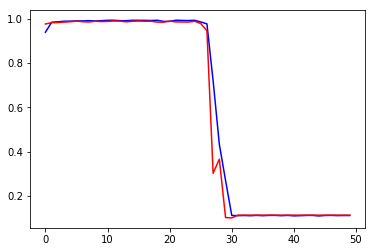

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(log.history['acc'],'b') 
plt.plot(log.history['val_acc'],'r')
plt.show()

**Note**: The case above is a quite drastic case because we deliberately made the model overfit by having high learning rate and longer epoch as well as removing removing batch norm and dropout layers. Note that the plot is of accuracy not loss. If you like, you may save the log.history (It's a dictionary) using pickle: https://wiki.python.org/moin/UsingPickle

#### Exercise 1. Learning rate
Without inserting batchnorm or dropout again, decrease learning rate and run for 50 epochs, plot the accuracy from train and validation. What is the highest learning rate that it doesn't overfit? What is the validation accuracy as a result?

In [ ]:
#Your code here

#### Exercise 2. Dropout
Now, add dropouts and run with the same hyperparameters (learning rate, epochs) you found from above. Time the model.fit() using `time.time`. 
1) Does it take longer training time by adding dropouts?
2) For the same epoch, is your final validation accuracy better? If not better and you're sure it's not overfitting yet, try to increase either your learning rate or epoch, OR change your dropout rate(s). Record your optimum values. 

In [ ]:
#Your code here

#### Exercise 3. Batch Normalization
Now, get rid of dropouts and add batch normalization layers. Choose learning rate between 0.01 and 0.001. Find the largest learning rate that still does not overfit but gives highest accuracy.
Time model.fit() using `time.time`. 
Plot the 'acc' and 'val_acc'
Compare the learning rate with those from Exercise 1 and 2. What do you find?

In [ ]:
#Your code here